# Clustring with K-means on ls_orchid.fasta

In [1]:
# Filename extensions:	.fasta, .fas, .fa, .fna, .ffn, .faa, .mpfa, .frn
# Internet media type: text/x-fasta
# Uniform Type Identifier (UTI)	no
# Developed by	David J. Lipman
# William R. Pearson[1][2]
# Initial release	1985
# Type of format	Bioinformatics
# Extended from	ASCII for FASTA
# Extended to	FASTQ format[3]
# Website	www.ncbi.nlm.nih.gov/BLAST/fasta.shtml

# FASTA format
!wget https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/ls_orchid.fasta

--2024-11-27 13:11:06--  https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/ls_orchid.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76480 (75K) [text/plain]
Saving to: ‘ls_orchid.fasta’

ls_orchid.fasta     100%[===================>]  74.69K  --.-KB/s    in 0.02s   

2024-11-27 13:11:06 (4.79 MB/s) - ‘ls_orchid.fasta’ saved [76480/76480]



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
len of lables: 94


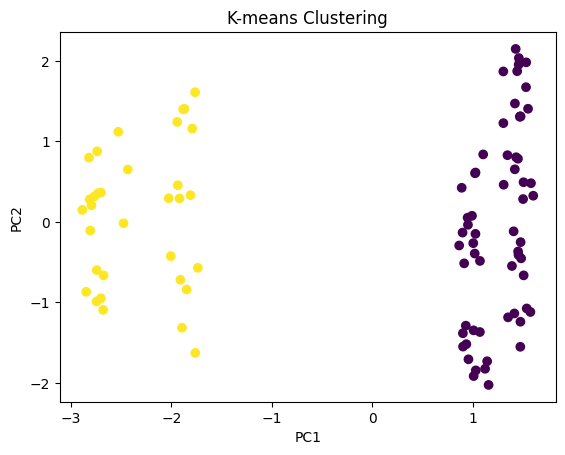

In [8]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the FASTA file
with open('ls_orchid.fasta', 'r') as f:
    sequences = [line.strip() for line in f.readlines() if line.startswith('>')]

# Convert the sequences to k-mer frequency features
# 3-mer, Tokenization, Vocabulary Building, Counting, Matrix Representation
vectorizer = CountVectorizer(analyzer='char', ngram_range=(3, 3))
# vectorizer = CountVectorizer(analyzer='char', ngram_range=(5, 5))
X = vectorizer.fit_transform(sequences)

# # Apply k-means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# # Print the cluster assignments
print(kmeans.labels_)
print(f"len of lables: {len(kmeans.labels_)}")


# # Plot the clusters using PCA
from sklearn.decomposition import PCA
# Principal component analysis (PCA) is a linear dimensionality reduction technique with applications in exploratory data analysis, visualization and data preprocessing.
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.toarray())
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()